In [1]:
import torch

In [2]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/ad/1e/62ed77dbb887a963c788c61dc6e740c1d16462fcdd37acf247099f1a911b/ultralytics-8.0.229-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 5.6 MB/s eta 0:00:0000:0100:01


In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


100%|██████████| 6.23M/6.23M [00:00<00:00, 75.3MB/s]



image 1/1 /kaggle/input/data-deep/coco_minitrain_25k/images/val2017/000000000802.jpg: 640x448 1 oven, 1 refrigerator, 90.4ms
Speed: 5.3ms preprocess, 90.4ms inference, 26.7ms postprocess per image at shape (1, 3, 640, 448)


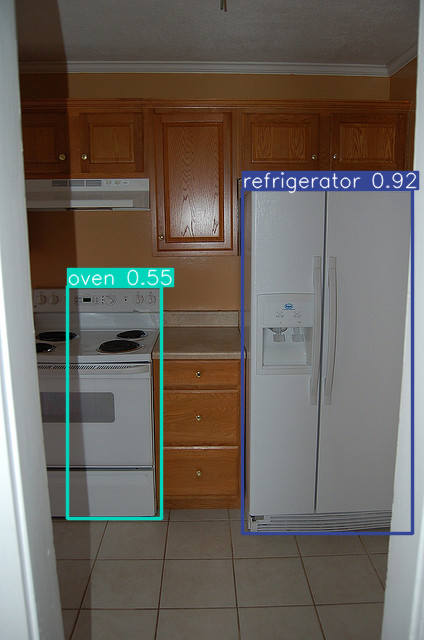

In [5]:
from PIL import Image
from IPython.display import display
results = model('/kaggle/input/data-deep/coco_minitrain_25k/images/val2017/000000000802.jpg')  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)  # show image

In [6]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [7]:
import cv2
import os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [8]:
import json

f = open('/kaggle/input/data-deep/coco_minitrain_25k/annotations/instances_minitrain2017.json')
anns = json.load(f)
print(anns.keys())

dict_keys(['images', 'info', 'licenses', 'annotations', 'categories'])


In [9]:
# Write to yaml file for yolov8
from ruamel.yaml import YAML
img_path = "/kaggle/input/data-deep/coco_minitrain_25k/images/"
data = {"path": "/kaggle/input/data-deep/coco_minitrain_25k", 
        "train": img_path + "train2017", 
        "val": img_path + "val2017", 
        "names": {}}
id = 0
for ann in anns['categories']:
    data["names"][id] = ann['name']
    id += 1
yaml = YAML()
file_path = "example.yaml"

# Write to the YAML file
with open(file_path, "w") as file:
    yaml.dump(data, file)

In [10]:
print(data)

{'path': '/kaggle/input/data-deep/coco_minitrain_25k', 'train': '/kaggle/input/data-deep/coco_minitrain_25k/images/train2017', 'val': '/kaggle/input/data-deep/coco_minitrain_25k/images/val2017', 'names': {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'don

In [11]:
# Set the model to evaluation mode
model.val(data="/kaggle/working/example.yaml")

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
val: Scanning /kaggle/input/data-deep/coco_minitrain_25k/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:20<00:00, 246.69it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/data-deep/coco_minitrain_25k/labels is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:46<00:00,  6.68it/s]


                   all       5000      36335      0.633      0.475      0.521      0.371
                person       5000      10777      0.754      0.673      0.745      0.514
               bicycle       5000        314      0.687      0.392      0.457      0.265
                   car       5000       1918      0.646      0.515      0.561      0.364
            motorcycle       5000        367       0.71       0.58      0.655      0.414
              airplane       5000        143      0.814      0.766      0.832      0.653
                   bus       5000        283      0.746      0.643      0.739       0.62
                 train       5000        190      0.798       0.77      0.834      0.646
                 truck       5000        414      0.549      0.399      0.435      0.293
                  boat       5000        424      0.583        0.3      0.377       0.21
         traffic light       5000        634      0.644      0.345      0.409      0.211
          fire hydran

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad7b216b460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024